### Linear Regression

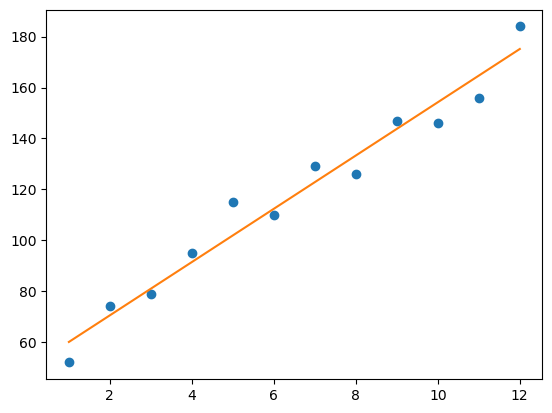

In [1]:
# Linear Regression
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return b, m

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

### Multiple Linear Regression

In [5]:
# Multiple Linear Regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()

ols.fit(x_train, y_train)

# Plot the figure

fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

# Define the boundaries of the surface
size_sqft = np.linspace(0, 4500, num=100)
building_age_yrs = np.linspace(0, 140, num=100)

# Create a meshgrid
size_sqft, building_age_yrs = np.meshgrid(size_sqft, building_age_yrs)

# Flatten the meshgrid and create a 2D array with size_sqft and building_age_yrs as columns
X_surface = np.column_stack((size_sqft.ravel(), building_age_yrs.ravel()))

# Predict the rent values
y_surface = ols.predict(X_surface).reshape(size_sqft.shape)

# Plot the surface
ax.plot_surface(size_sqft, building_age_yrs, y_surface, alpha=.7)


ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Add the code below:
plt.show()

/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Figure size 600x400 with 0 Axes>

In [8]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

df.head(5)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
print(type(streeteasy))

df = pd.DataFrame(streeteasy)
print(type(df))

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=42)  

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [5]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

# finds the coefficients and the intercept value
mlr.fit(x_train, y_train)

# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values. 
y_predict = mlr.predict(x_test)

# Sonny doesn't have an elevator so the 11th item in the list is a 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

print(mlr.coef_) # prints the coefficients
print(mlr.intercept_) # prints the intercept

Predicted rent: $2316.95
[[-323.18037846 1100.36073483    5.06791062  -18.53594813   24.06766806
    -7.28400695  -91.86128717   23.51171345   77.5829648  -147.8475012
    76.46277834    7.26226214 -143.278248     17.3709914 ]]
[-465.70085855]


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


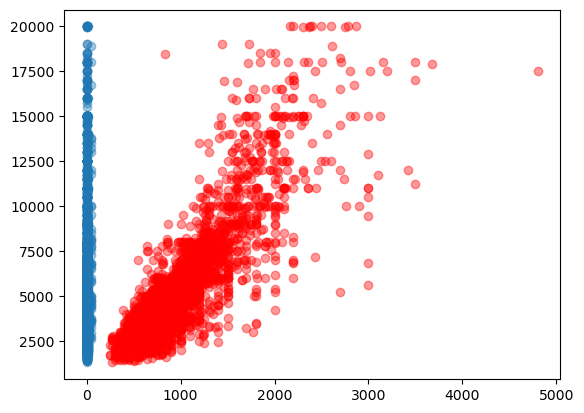

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df[['size_sqft']], df[['rent']], c='red', alpha=0.4)
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

plt.show()

In [8]:
# R^2 value is a measure of how well our model can predict the rent values.
# The equation is 1 - (u/v), where u is the residual sum of squares ((y - y_predict) ** 2).sum() and v is the total sum of squares ((y - y.mean()) ** 2).sum()
# Simply 1 - (RSS/TSS) =  ESS/TSS

print("Train score: ")
print(mlr.score(x_train, y_train))

print("Test score: ")
print(mlr.score(x_test, y_test))

Train score: 
0.7865923403878722
Test score: 
0.7464851009180753


### Logistic Regression

Log-Odds: ln(p / (1-p)) = regular (multiple) linear regression's equation
Odds: p / (1-p)
p = np.exp(log_odds)/(1+ np.exp(log_odds))

In [ ]:
# Import pandas and the data
import pandas as pd
codecademyU = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

# Create and fit the logistic regression model here:
from sklearn.linear_model import LogisticRegression
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.coef_)
print(cc_lr.intercept_)

# Print out the predicted outcomes for the test data
print(cc_lr.predict(X_test))

# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])

# Print out the true outcomes for the test data
print(y_test)

#### Classification Thresholding: 분류임계값
#### Confusion 

Accuracy = (TP + TN)/(TP + FP + TN + FN)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 score: weighted average of precision and recall

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit your logistic regression model (clf) to your data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Get the predicted probabilities
probabilities = clf.predict_proba(X_test)

# Set your custom threshold (e.g., 0.4)
threshold = 0.4

# Create binary predictions based on the threshold
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)


In [ ]:
# accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
# output: 0.7

# precision:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred))
# output: 0.67

# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred))
# output: 0.8

# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred))
# output: 0.73


## Classification

### K-Nearest Neighbors Classifier:
1. Normalize the data
2. Find the k nearest neighbors
3. Classify the new point based on those neighbors

In [ ]:
# Distance Formula

from scipy.spatial import distance

def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

def manhattan_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

def hamming_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    if pt1[i] != pt2[i]:
      distance += 1
  return distance

print(euclidean_distance([1, 2], [4, 0]))
print(manhattan_distance([1, 2], [4, 0]))
print(hamming_distance([5, 4, 9], [1, 7, 9]))

print(distance.euclidean([1, 2], [4, 0]))
print(distance.cityblock([1, 2], [4, 0]))
print(distance.hamming([5, 4, 9], [1, 7, 9])) # 2/3 in scipy

In [ ]:
# Finding the Nearest Neighbors

from movies import movie_dataset, movie_labels

print(movie_dataset['Bruce Almighty']) # [0.006630902005283176, 0.21843003412969283, 0.8539325842696629]
print(movie_labels['Bruce Almighty']) # 'Comedy'

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, k):
  distances = []

  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    distances.append([distance_to_point, title])
  
  distances.sort()

  neighbors = distances[0:k]

  return neighbors

print(classify([.4, .2, .9], movie_dataset, 5))
    """
    [[0.08273614694606074, 'Lady Vengeance'], [0.22989623153818367, 'Steamboy'], 
    [0.23641372358159884, 'Fateless'], [0.26735445689589943, 'Princess Mononoke'], 
    [0.3311022951533416, 'Godzilla 2000']]
    """

In [ ]:
# Count Neighbors

from movies import movie_dataset, movie_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  num_good = 0
  num_bad = 0
  
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]

  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1

  if num_good > num_bad:
    return 1
  else:
     return 0
  

print(classify([.4, .2, .9], movie_dataset, movie_labels, 5))

In [ ]:
# Vlaidation Error

from movies import training_set, training_labels, validation_set, validation_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

import pandas as pd
validation_set_df = pd.DataFrame(validation_set)
print(validation_set_df.head(5))

def find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, k):
    num_correct = 0.0
    for title in validation_set:
      guess = classify(validation_set[title], training_set, training_labels, k)
      if guess == validation_labels[title]:
        num_correct += 1
    validation_error = num_correct / len(validation_set)
    return validation_error

print(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, 3))

# When K is too small, the model is too sensitive to the noise in the data. This is called overfitting.
# When K is too large, the model is not sensitive enough to the noise in the data. This is called underfitting.
# Overfitting doesn't mean higher validation accuracy, it means higher variance. Underfitting doesn't mean lower accuracy, it means higher bias.
# As k increases, you begin to avoid overfitting and accuracy goes up. Once k gets too big, you begin to underfit, and accuracy will go back down.

In [ ]:
# Using scikit-learn

from movies import movie_dataset, labels
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(movie_dataset, labels)

unknown_movies = [
  [.45, .2, .5], [.25, .8, .9], [.1, .1, .9]
]

guesses = classifier.predict(unknown_movies)

print(guesses)

### K-Nearest Neighbor Regressor

In [ ]:
from movies import movie_dataset, movie_ratings

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def predict(unknown, dataset, movie_ratings, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  total = 0
  for neighbor in neighbors:
    title = neighbor[1]
    total += movie_ratings[title]
  return total / len(neighbors)

print(type(movie_dataset))
print(movie_dataset["Life of Pi"])
print(movie_ratings["Life of Pi"])

print(predict([0.016, 0.300, 1.022], movie_dataset, movie_ratings, 5))

In [ ]:
#Weighted K-Nearest Neighbors Regression

from movies import movie_dataset, movie_ratings

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def predict(unknown, dataset, movie_ratings, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  numerator = 0
  denominator = 0
  for neighbor in neighbors:
    rating = movie_ratings[neighbor[1]]
    distance_to_neighbor = neighbor[0]
    numerator += rating / distance_to_neighbor
    denominator += 1 / distance_to_neighbor
  return numerator/denominator

print(predict([0.016, 0.300, 1.022], movie_dataset, movie_ratings, 5))

In [ ]:
# Scikit-learn
from movies import movie_dataset, movie_ratings
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 5, weights = "distance")

regressor.fit(movie_dataset, movie_ratings)

unknown_movies = [
  [0.016, 0.300, 1.022],
  [0.0004092981, 0.283, 1.0112],
  [0.00687649, 0.235, 1.0112]
]
 
predictions = regressor.predict(unknown_movies)

print(predictions)

### Decision Trees

  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


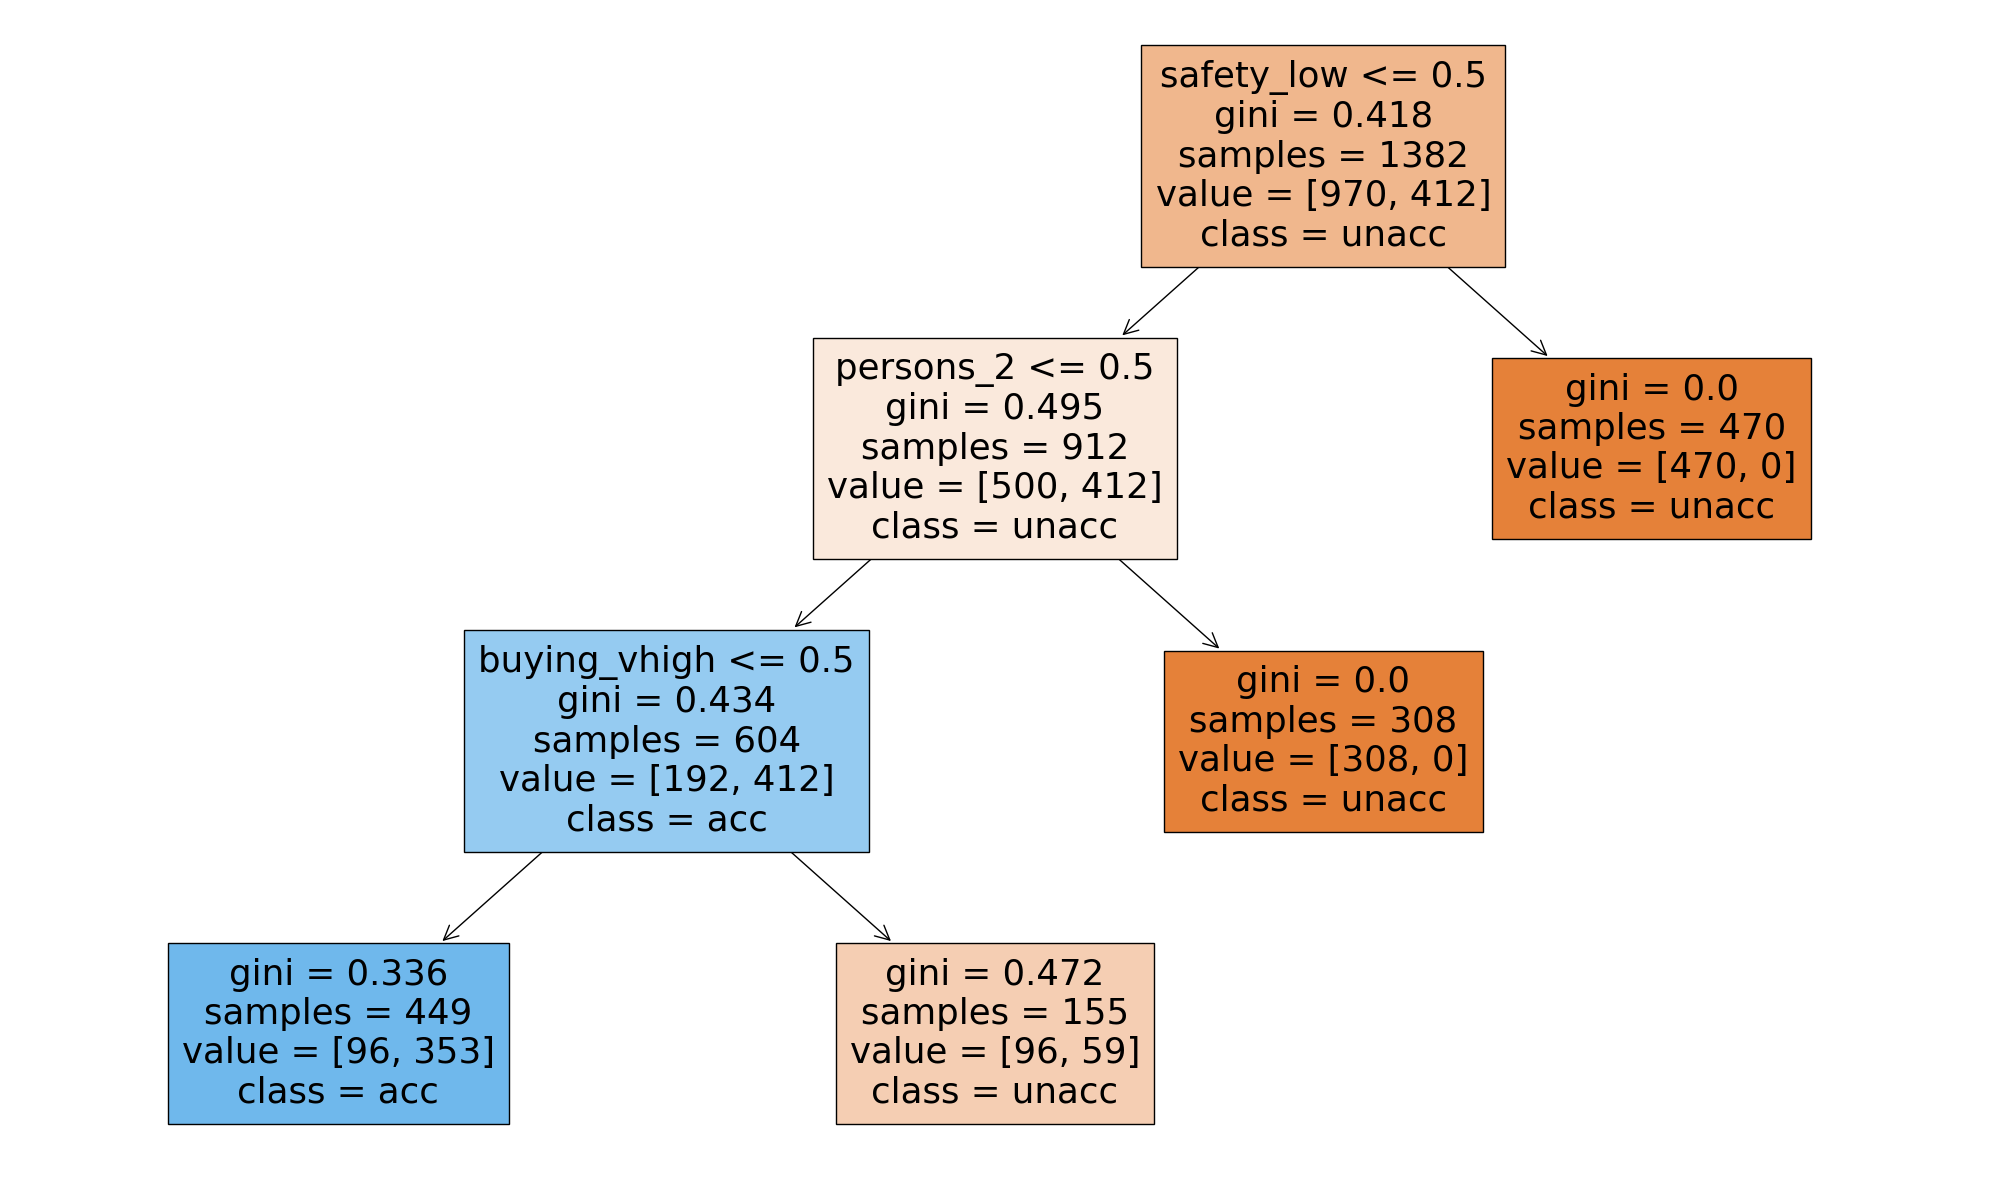

In [57]:
import pandas as pd
import numpy as np
# import codecademylib3
import matplotlib.pyplot as plt


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Loading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

# 1a. Take a look at the dataset
print(df.head())

# 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

# 1c. Examine the new features
print(X.columns)
print(len(X.columns))

# 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

# 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

# 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

'\nPros and cons of using Gini importance:\nBecause Gini impurity is used to train the decision tree itself, it is computationally inexpensive to calculate. However, Gini impurity is somewhat biased \ntoward selecting numerical features (rather than categorical features). It also does not take into account the correlation between features. \nFor example, if two highly correlated features are both equally important for predicting the outcome variable, one of those features may have low Gini-based \nimportance because all of it’s explanatory power was ascribed to the other feature. This issue can be mediated by removing redundant features before fitting \nthe decision tree.\n\nOther measures of feature importance: \nAggregate methods - Random forests are an ensemble-based machine learning algorithm that utilize many decision trees (each with a subset of features) to predict the outcome variable.\nPermutation-based methods - Another way to test the importance of particular features is to 

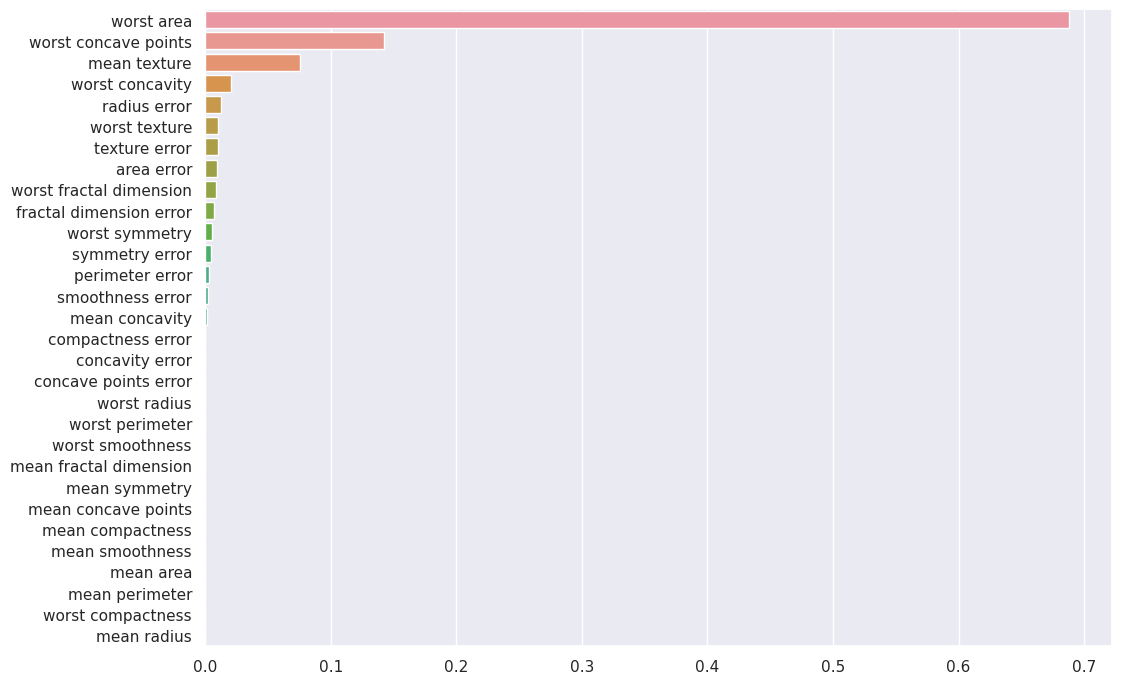

In [61]:
# Gini Impurity for feature importance

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets 

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)

# Print the feature importances
feature_importances = clf.feature_importances_

import seaborn as sns

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = dataset.feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)

"""
Pros and cons of using Gini importance:
Because Gini impurity is used to train the decision tree itself, it is computationally inexpensive to calculate. However, Gini impurity is somewhat biased 
toward selecting numerical features (rather than categorical features). It also does not take into account the correlation between features. 
For example, if two highly correlated features are both equally important for predicting the outcome variable, one of those features may have low Gini-based 
importance because all of it’s explanatory power was ascribed to the other feature. This issue can be mediated by removing redundant features before fitting 
the decision tree.

Other measures of feature importance: 
Aggregate methods - Random forests are an ensemble-based machine learning algorithm that utilize many decision trees (each with a subset of features) to predict the outcome variable.
Permutation-based methods - Another way to test the importance of particular features is to essentially remove them from the model (one at a time) and see how much predictive accuracy suffers.
Coefficients - When we fit a general(ized) linear model (for example, a linear or logistic regression), we estimate coefficients for each predictor. 
 However, similar to the other methods described above, these coefficients do not take highly correlated features into account.


"""

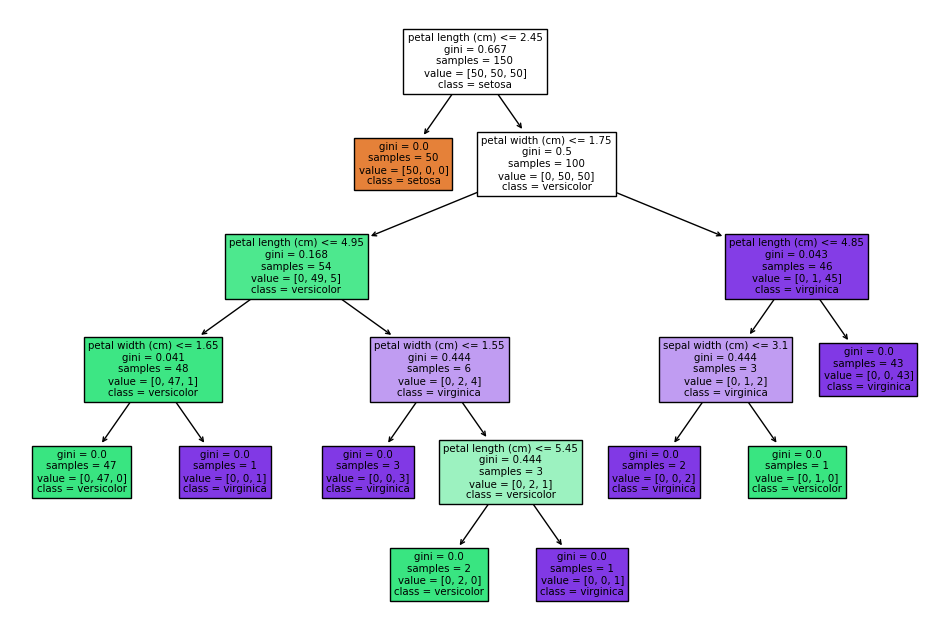

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load a sample dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))  # Set the size of the figure
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
# Decision Tree: Information Gain

#1. Information gain at a pure node (i.e., node with no more branches!)
r = 0.5 #ratio of new split, could be anything
gini_pure_node = 0
gini_info_gain = r*gini_pure_node  + (1-r)*gini_pure_node 
print(f'Gini information gain pure node split safety_low >= .5 : {gini_info_gain}')

#2. Information gain at the 'persons_2' split
r_persons_2 = 604/912 #read ratio of the split from the tree!
gini_left_split = 0.434
gini_right_split = 0
initial_gini_persons_2 = 0.495

weighted_gini_persons_2 = r_persons_2*gini_left_split + (1-r_persons_2)*gini_right_split

gini_info_gain_persons_2 = initial_gini_persons_2 - weighted_gini_persons_2

print(f'Gini information gain node persons_2 : {gini_info_gain_persons_2}')

In [4]:
## The usual libraries, loading the dataset and performing the train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

#### -----------------------------------
## 1. Calculate sample sizes for a split on `persons_2`
print("1. Calculate sample sizes for a split on `persons_2`")
left = y_train[x_train['persons_2']==0]
right = y_train[x_train['persons_2']==1]
len_left = len(left)
len_right = len(right)

print ('No. of cars with persons_2 == 0:', len_left)
print ('No. of cars with persons_2 == 1:', len_right)

# 2. Gini impurity calculations
print("\n 2. Gini impurity calculations")
gi = gini(y_train)
gini_left = gini(left)
gini_right = gini(right)

print('Original gini impurity (without splitting!):', gi)
print('Left split gini impurity:', gini_left)
print('Right split gini impurity:', gini_right)

# 3.Information gain when using feature `persons_2`
print("\n 3.Information gain when using feature `persons_2`")
info_gain_persons_2 = info_gain(left, right, gi)
print(f'Information gain for persons_2:', info_gain_persons_2)

# 4. Which feature split maximizes information gain?
print("\n 4. Which feature split maximizes information gain?")
info_gain_list = []
for i in x_train.columns:
    left = y_train[x_train[i]==0]
    right = y_train[x_train[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')
print(info_gain_table)

1. Calculate sample sizes for a split on `persons_2`
No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465

 2. Gini impurity calculations
Original gini impurity (without splitting!): 0.41848785606128835
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0

 3.Information gain when using feature `persons_2`
Information gain for persons_2: 0.09013468781461476

 4. Which feature split maximizes information gain?
Greatest impurity gain at:0    safety_low
1      0.091603
Name: 19, dtype: object
                 0         1
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002

In [5]:
# How a Decision Tree is Built (Recursion)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

y_train_sub = y_train[x_train['safety_low']==0]
x_train_sub = x_train[x_train['safety_low']==0]

gi = gini(y_train_sub)
print(f'Gini impurity at root: {gi}')

info_gain_list = []
for i in x_train.columns:
    left = y_train_sub[x_train_sub[i]==0]
    right = y_train_sub[x_train_sub[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')

Gini impurity at root: 0.49534472145275465
Greatest impurity gain at:0    persons_2
1     0.208137
Name: 12, dtype: object


In [1]:
# Train and Predict using `scikit-learn`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f'Decision Tree parameters: {dtree.get_params()}')

## 2. Fit decision tree on training set and print the depth of the tree

dtree.fit(x_train, y_train)
print(f'Decision tree depth: {dtree.get_depth()}')

## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)

print(f'Test set accuracy: {dtree.score(x_test, y_test)}') # or accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
# Accuracy is the proportion of correctly classified instances in the test set
# The accuracy score's formula is (TP + TN) / (TP + TN + FP + FN)


Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9855491329479769
Test set accuracy: 0.9855491329479769


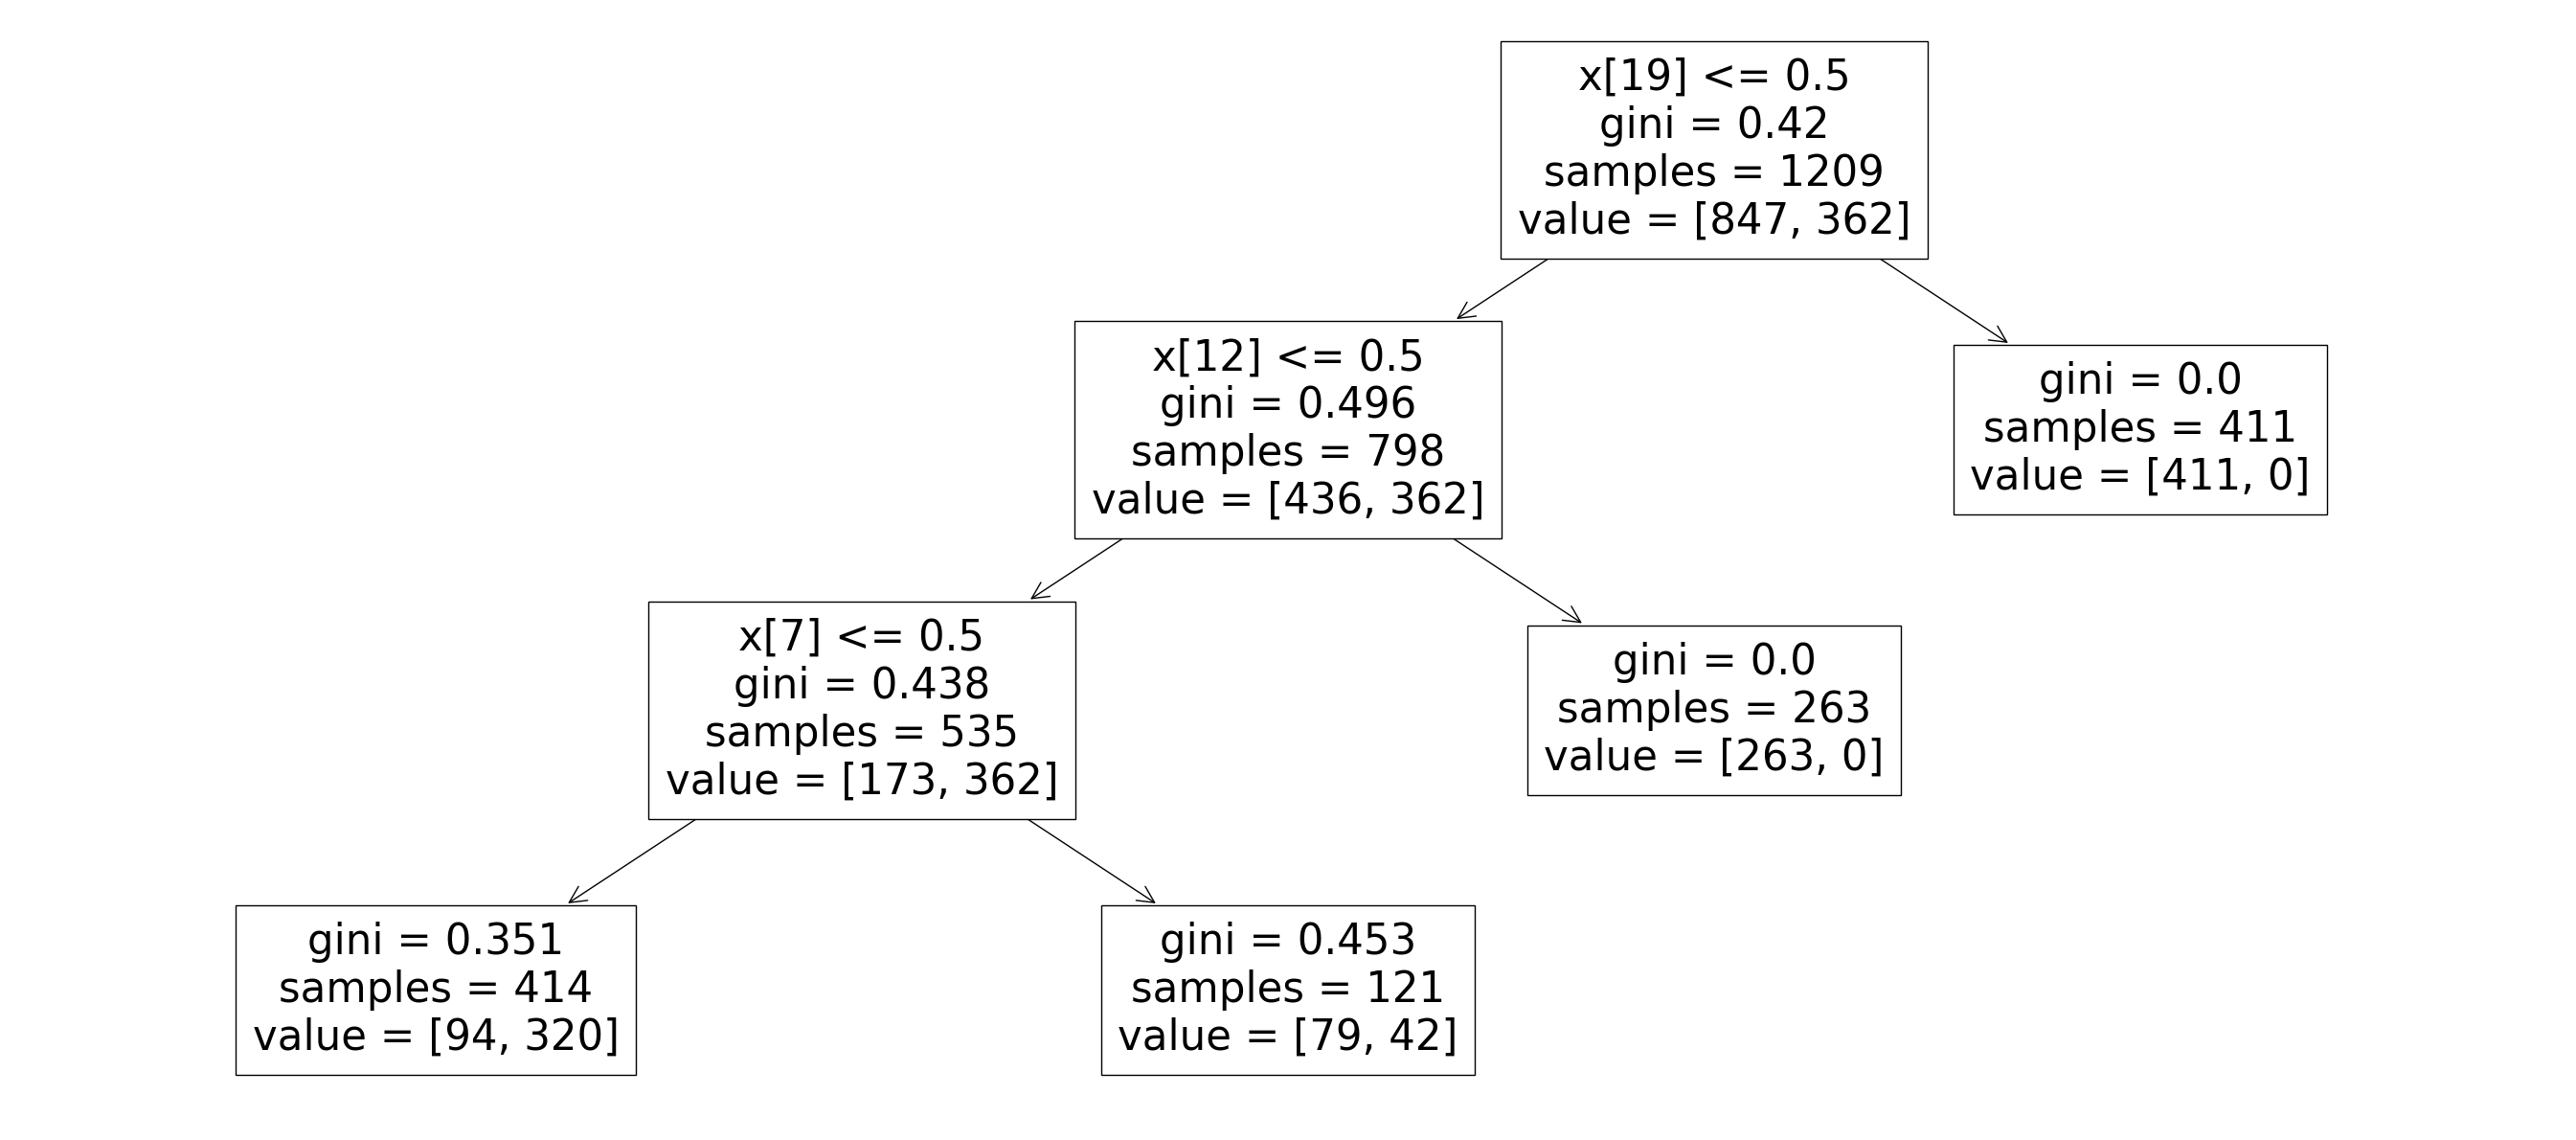

|--- feature_19 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: True
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: False
|   |--- feature_12 >  0.50
|   |   |--- class: False
|--- feature_19 >  0.50
|   |--- class: False



In [6]:
# Visualizing Decision Trees

# import codecademylib3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Loading the data and setting target and predictor variables
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## Train-test split and fitting the tree
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree))

In [4]:
## The usual libraries, loading the dataset and performing the train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

#### -----------------------------------
## 1. Calculate sample sizes for a split on `persons_2`
print("1. Calculate sample sizes for a split on `persons_2`")
left = y_train[x_train['persons_2']==0]
right = y_train[x_train['persons_2']==1]
len_left = len(left)
len_right = len(right)

print(left.head())
y_train.head()
x_train['persons_2'].head()

1. Calculate sample sizes for a split on `persons_2`
361     False
315     False
1372     True
1720     True
820     False
Name: accep, dtype: bool


1649     True
1465     True
361     False
315     False
1372    False
Name: persons_2, dtype: bool

In [7]:
# Decision Tree using scikit-learn

import pandas as pd
import numpy as np
# import codecademylib3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

## 1. Two decision trees
dtree1 = DecisionTreeClassifier()
dtree2 = DecisionTreeClassifier(max_depth = 7)

## Fit first decision tree
dtree1.fit(x_train, y_train)
dtree1_depth = dtree1.get_depth()
print(f'First Decision Tree depth: {dtree1_depth}')

## Fit second decision tree
dtree2.fit(x_train, y_train)
dtree2_depth = dtree2.get_depth()
print(f'Second Decision Tree depth: {dtree2_depth}')

## 2. Calculate accuracy scores on test data for both trees
dtree1_score = dtree1.score(x_test, y_test)
print(f'Test set accuracy tree no max depth: {dtree1_score}')# or accuracy_score(y_test, y_pred)

dtree2_score = dtree2.score(x_test, y_test)
print(f'Test set accuracy tree max depth 7: {dtree2_score}')# or accuracy_score(y_test, y_pred)


First Decision Tree depth: 11
Second Decision Tree depth: 7
Test set accuracy tree no max depth: 0.9788053949903661
Test set accuracy tree max depth 7: 0.9614643545279383


In [8]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

actual = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
predicted = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for i in range(len(predicted)):
  if actual[i] == 1 and predicted[i] == 1:
    true_positives += 1
  elif actual[i] == 0 and predicted[i] == 0:
    true_negatives += 1
  elif actual[i] == 1 and predicted[i] == 0:
    false_negatives += 1
  elif actual[i] == 0 and predicted[i] == 1:
    false_positives += 1

print(true_positives, true_negatives, false_positives, false_negatives)

conf_matrix = confusion_matrix(actual, predicted)

print(confusion_matrix)

3 0 3 4
<function confusion_matrix at 0x7f9baa9d7a60>


In [ ]:
# Accuracy, Precision, Recall, F1 Score
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
# The F1 score is the harmonic mean of precision and recall
# Harmonic mean = (2 * (a * b)) / (a + b)

### Feature Selection

1. Filter Methods: By filtering features prior to model building based on some criteria
   - pros: Computationally inexpensive, Can work for any type of ML model
   - cons: More difficult to take multivariate relationships (Not evaluating model performance) e.g: For example, a variable might not have much predictive power on its own, but can be informative when combined with other variables. Not tailored toward specific types of models
   - e.g: Variance thresholds, Correlation, Mutual information
2. Wrapper Methods: Involve fitting a model and evaluating its performance for a particular subset of features. By using a search algorithm to find which combination of features can optimize the performance of a given model
   - pros: can determine the optimal set of features that produce the best results
   - cons: computationally expensive
   - e.g: Forward/backward/bidirectional sequential feature selection / Recursive feature elimination
3. Embedded Methods: Involve building and evaluating models for different feature subsets, but their feature selection process happens at the same time as their model fitting step
   - pros: Like wrapper methods, they can optimize the feature set for a particular model and account for multivariate relationships. less computationally expensive because feature selection happens during model training
   - e.g: Regularization (e.g., lasso/ridge regression) / Tree-based feature importance

In [11]:
# Feature Selection
# Filter Method

import pandas as pd

df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

print(df)

# 10 x 6 features matrix
X = df.drop(columns=['exam_score'])

print(X)

# 10 x 1 target vector
y = df['exam_score']

print(y)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level  \
0  bachelors            1         4           10        155            8   
1  bachelors            2         3           10        151            8   
2  bachelors            3         4            8        160            8   
3    masters            3         3            8        160            8   
4    masters            3         2            6        156            8   
5    masters            4         3            6        150            8   
6    masters            3         2            8        164            8   
7        phd            4         2            8        151            8   
8        phd            5         1           10        158            8   
9        phd            5         1           10        152            8   

   exam_score  
0          71  
1          72  
2          78  
3          79  
4          85  
5          86  
6          92  
7          93  
8          99  
9  

In [12]:
# Variance Threshold: Remove Low Variance Features

X_num = X.drop(columns=['edu_goal'])

print(X_num)

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(X_num)) # grade_level was removed

# loading datasets with scikit-learn generally works with numpy arrays internally
# It means that the column names are lost after the transformation
# Luckily, we can use the get_support() method to get the indices of the selected features

# Specify `indices=True` to get indices of selected features
print(selector.get_support(indices=True))

# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])

print(num_cols)

# Subset `X_num` to retain only selected features
X_num = X_num[num_cols]

print(X_num)

# To obtain our entire features DataFrame, including the categorical column edu_goal, we could do:
X = X[['edu_goal'] + num_cols]

print(X)

   hours_study  hours_TV  hours_sleep  height_cm  grade_level
0            1         4           10        155            8
1            2         3           10        151            8
2            3         4            8        160            8
3            3         3            8        160            8
4            3         2            6        156            8
5            4         3            6        150            8
6            3         2            8        164            8
7            4         2            8        151            8
8            5         1           10        158            8
9            5         1           10        152            8
[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]
[0 1 2 3]
['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']
   hours_study  hours_TV  hours_sleep  height_cm
0           

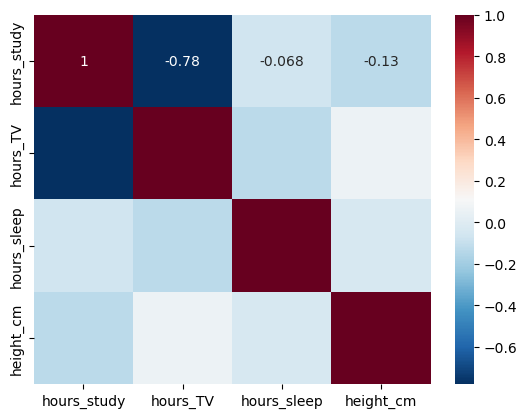

In [15]:
# Filter Method: Pearson Correlation
"""
Another type of filter method involves finding the correlation between variables. In particular, the Pearson’s correlation coefficient is useful for 
measuring the linear relationship between two numeric, continuous variables — a coefficient close to 1 represents a positive correlation, -1 represents 
a negative correlation, and 0 represents no correlation.
"""

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()


In [16]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])


hours_TV hours_study -0.780763315142435


   hours_study  hours_TV  hours_sleep  height_cm  exam_score
0            1         4           10        155          71
1            2         3           10        151          72
2            3         4            8        160          78
3            3         3            8        160          79
4            3         2            6        156          85
5            4         3            6        150          86
6            3         2            8        164          92
7            4         2            8        151          93
8            5         1           10        158          99
9            5         1           10        152         100
               exam_score
hours_study  9.048441e-01
hours_TV    -9.008659e-01
hours_sleep  1.197402e-16
height_cm    1.458693e-02


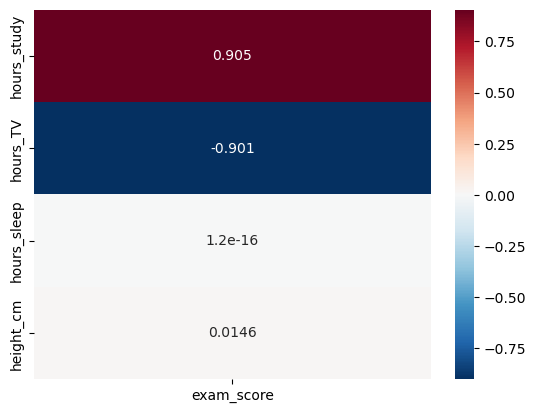

In [18]:
X_y = X_num.copy()
X_y['exam_score'] = y

print(X_y)

corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])

print(corr_target)
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [19]:
# Instead of generating the full correlation matrix, we could use the f_regression() function from scikit-learn
# The F-statistic will be larger (and p-value will be smaller) for predictors that are more highly correlated with the target variable

from sklearn.feature_selection import f_regression

print(f_regression(X_num, y))
# For example, amongst all the features, hours_study has the largest correlation coefficient (0.905), highest F-statistic (3.61e+01), and lowest p-value (3.19e-04).

(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03]), array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01]))


In [20]:
# Mutual Information: 
# Mutual information is a measure of dependence between two variables and can be used to gauge how much a feature contributes to the prediction 
# of the target variable. It is similar to Pearson’s correlation, but is not limited to detecting linear associations

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create copy of `X` for encoded version
X_enc = X.copy()
X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])

print(X_enc)


   edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0         0            1         4           10        155
1         0            2         3           10        151
2         0            3         4            8        160
3         1            3         3            8        160
4         1            3         2            6        156
5         1            4         3            6        150
6         1            3         2            8        164
7         2            4         2            8        151
8         2            5         1           10        158
9         2            5         1           10        152


In [21]:
from sklearn.feature_selection import mutual_info_regression

print(mutual_info_regression(X_enc, y, random_state=68))


[0.58230159 0.32230159 0.60063492 0.14896825 0.        ]


In [22]:
# In order to properly calculate the mutual information, we need to tell mutual_info_regression() which features are discrete by providing 
# their index positions using the discrete_features parameter
# For example, if we want to treat the edu_goal feature as discrete, we can do the following:

print(mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68))

[0.69730159 0.44730159 0.53063492 0.06896825 0.        ]


In [23]:
# SelectKBest: to help pick out the top k features with the highest ranked scores.

from sklearn.feature_selection import SelectKBest
from functools import partial

score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)

# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)

print(selection.fit_transform(X_enc, y))

[[0 1 4]
 [0 2 3]
 [0 3 4]
 [1 3 3]
 [1 3 2]
 [1 4 3]
 [1 3 2]
 [2 4 2]
 [2 5 1]
 [2 5 1]]


In [24]:
X = X[X.columns[selection.get_support(indices=True)]]

print(X)

    edu_goal  hours_study  hours_TV
0  bachelors            1         4
1  bachelors            2         3
2  bachelors            3         4
3    masters            3         3
4    masters            3         2
5    masters            4         3
6    masters            3         2
7        phd            4         2
8        phd            5         1
9        phd            5         1


In [26]:
# Feature Selection: Wrapper Method

import pandas as pd

health = pd.read_csv("./data/dataR2.csv")

print(health.head())

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


In [29]:
from sklearn.linear_model import LogisticRegression

# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X, y)
# Print the accuracy of the model
accuracy = lr.score(X, y)

print(accuracy)

0.8017241379310345


In [34]:
# Wrapper Method: Sequential Forward Selection
# Sequential forward selection is a wrapper method that builds a feature set by starting with no features and then adding one feature at a time 
# until a desired number of features is reached.

import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Sequential forward selection
sfs = SFS(lr,
  k_features = 5,
  forward = True,
  floating = False,
  scoring = 'accuracy',
  cv = 0
)

# Fit the equential forward selection model
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(5, 5), scoring='accuracy')

('Age', 'Glucose', 'Insulin', 'HOMA', 'Adiponectin')
0.7586206896551724


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


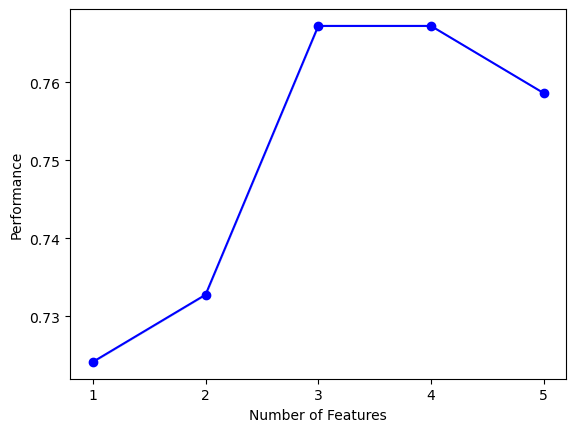

In [39]:
# Evaluating the Result of Sequential Forward Selection

# sfs.subsets_

# Print a tuple of feature names after 5 features are added
print(sfs.subsets_[5]['feature_names'])

# Print the accuracy of the model after 5 features are added
print(sfs.subsets_[5]['avg_score'])

# For visualizing the results of the sequential forward selection, we can use the plot_sequential_feature_selection() function from mlxtend.plotting
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

In [38]:
# Wrapper Method: Sequential Backward Selection
# Sequential backward selection is a wrapper method that builds a feature set by starting with all features and then removing one feature at a time

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False, # Sequential Backward Selection when False
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit sbs to X and y
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(3, 3), scoring='accuracy')

('Age', 'BMI', 'Glucose', 'Insulin', 'Resistin')
0.7931034482758621


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


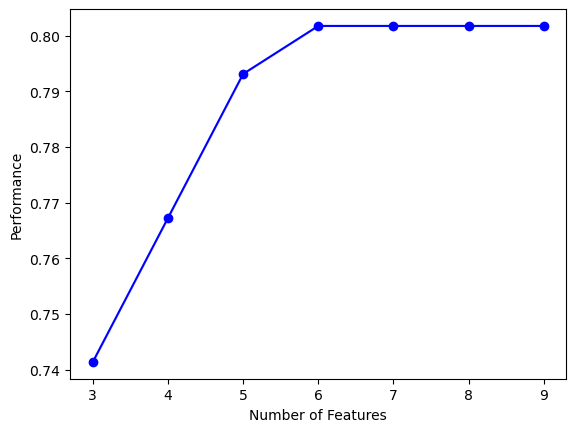

In [41]:
# Print the chosen feature names
print(sbs.subsets_[5]['feature_names'])
# Print the accuracy of the model after sequential backward selection
print(sbs.subsets_[5]['avg_score'])
# Plot the model accuracy
plot_sfs(sbs.get_metric_dict())
plt.show()

In [42]:
# Wrapper Method: Sequential Forward Floating Selection / Sequential Backward Floating Selection
# Those floating methods are a combination of forward and backward selection. They add and remove features one at a time, but they allow for
# features to be added and removed more than once during the process depending on the model performance.

# Sequential forward floating selection
sffs = SFS(lr,
          k_features=3,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[3]['feature_names'])

# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward= False,
          floating= True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(sbfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')
('Age', 'Glucose', 'Resistin')


In [43]:
# Wrapper Method: Recursive Feature Elimination
# Since it uses rank system, it's important to standardize the data before using RFE by using StandardScaler from sklearn.preprocessing

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(lr, n_features_to_select = 3)

rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [49]:
# Evaluating the Result of Recursive Feature Elimination
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("./data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Create a list of feature names
feature_list = list(X.columns)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)


print(rfe.ranking_)

print(rfe.support_)

# features is a list of feature names
# Get a list of features chosen by rfe
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

print(rfe_features)

# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X, y))

[4 1 1 2 3 5 7 1 6]
[False  True  True False False False False  True False]
['BMI', 'Glucose', 'Resistin']
0.7327586206896551


### Unsupervised Learning
- Clustering: Identifying clusters within a dataset like identifying disease outbreak clusters or in natural language processing, in creating word clouds that are semantically related, etc.
- Dimensionality Reduction/Feature Extraction: They can be used to condense the number of features in a dataset with a high number of features before applying a supervised learning algorithm.
- Automated Labelling/Tagging: Unsupervised learning algorithms are immensely useful in categorizing uncategorized data and one can then perform the familiar classification/regression tasks using supervised learning.

1. Perform dimensionality reduction using PCA
2. Classify images using PCA
3. Find clusters within data using K-Means
4. Extract features using PCA and K-Means

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creating the dataset
X = np.array([[1, 1000], [2, 2000], [3, 3000], [4, 4000], [5, 5000]])

# Applying PCA without standardization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Displaying the results
print("PCA without standardization:")
print(X_pca)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA after standardization
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# Displaying the results
print("\nPCA with standardization:")
print(X_pca_scaled)


PCA without standardization:
[[ 2.00000100e+03  4.48956040e-16]
 [ 1.00000050e+03 -1.49652013e-16]
 [-0.00000000e+00  0.00000000e+00]
 [-1.00000050e+03  1.49652013e-16]
 [-2.00000100e+03  2.99304027e-16]]

PCA with standardization:
[[ 2.00000000e+00  6.11741043e-17]
 [ 1.00000000e+00 -2.03913681e-17]
 [-0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  2.03913681e-17]
 [-2.00000000e+00  4.07827362e-17]]


In [ ]:
# Iris Dataset

import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

print(iris.data)

print(iris.target)

print(iris.data[0, :], iris.target[0])

print(iris.DESCR)

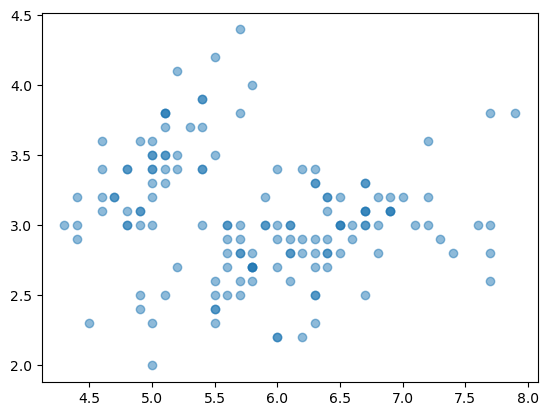

In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

# Store iris.data
samples = iris.data

# Create x and y
x = samples[:, 0]
y = samples[:, 1]

# Plot x and y
plt.scatter(x, y, alpha = 0.5) # alpha is for transparency

# Show the plot
plt.show()


[[4.71942267 4.11323936]
 [5.30823586 4.33422198]
 [7.6417664  4.36248109]]


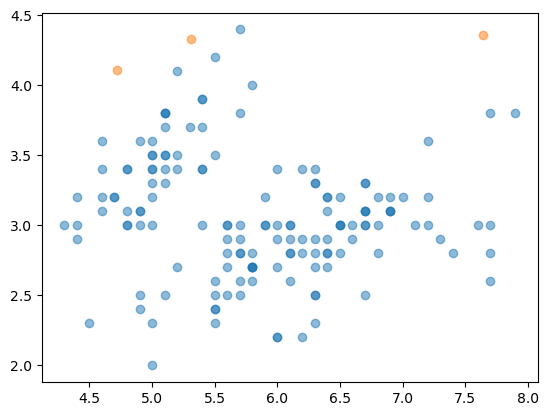

In [4]:
# The k-means algorithm: Step 1
# Place k random centroids for the initial clusters.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

# Number of clusters
k = 3 
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), k)
# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), k)
# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
print(centroids)
# Make a scatter plot of x, y
plt.scatter(x, y, alpha = 0.5)
# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y, alpha = 0.5)
# Display plot
plt.show()

In [7]:
# The k-means algorithm: Step 2
# Assign data samples to the nearest centroid.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data
# print(samples)

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

# Distance formula
def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))
# print(labels)

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances) # argmin returns the index of the smallest value
  return closest_centroid

# Assign the nearest centroid to each sample
for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Print labels
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# The k-means algorithm: Step 3
# Update centroids based on the above-assigned data samples.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample

def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# Assign the nearest centroid to each sample

for i in range(len(samples)):
  labels[i] = assign_to_centroid(samples[i], centroids)

# Step 3: Update centroids
centroids_old = deepcopy(centroids)

for i in range(k):
  points = []
  for j in range(len(sepal_length_width)):
    if labels[j] == i:
      points.append(sepal_length_width[j])
  centroids[i] = np.mean(points, axis=0)

print(centroids_old)
print(centroids)

[[6.37137383 2.23669822]
 [6.94033367 3.46644497]
 [4.94518717 3.29761212]]
[[6.01860465 2.67906977]
 [6.85609756 3.13414634]
 [5.1        3.25606061]]


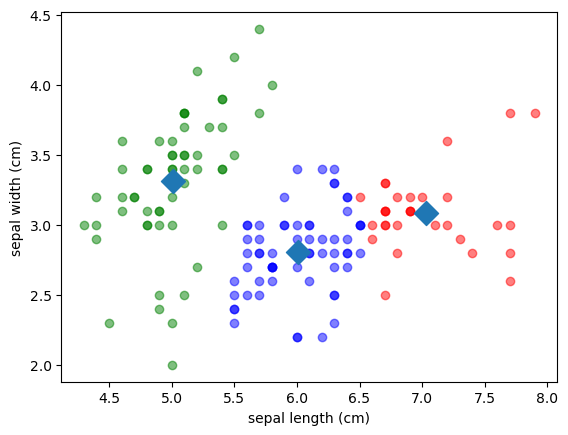

In [13]:
# The k-means algorithm: Step 4
# Repeat Steps 2 and 3 until convergence.

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

iris = datasets.load_iris()

samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))

# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

def distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = (one + two) ** 0.5
  return distance

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid

# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[i] = distance(centroids[i], centroids_old[i])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

In [14]:
# K-means Clustering with scikit-learn

import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans

iris = datasets.load_iris()
# print(iris)
samples = iris.data
# print("\n", samples)

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters = 3)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to determine the labels of samples 
labels = model.predict(samples)

# Print the labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Apply the same model to new data

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

# Store the new Iris measurements
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

# Predict labels for the new_samples
new_labels = model.predict(new_samples)
print(new_labels)

new_names = [iris.target_names[label] for label in new_labels]
print(new_names)

[1 0 0]
['versicolor', 'setosa', 'setosa']


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


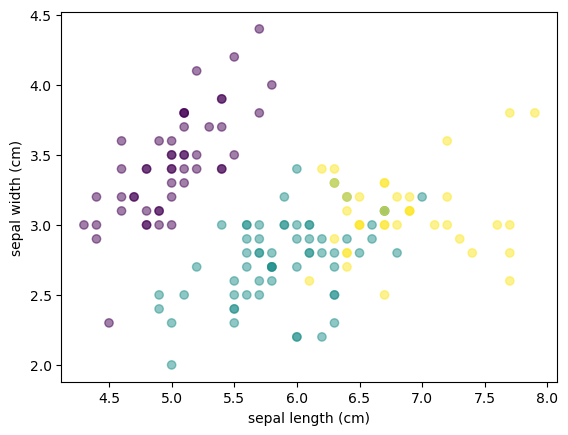

In [16]:
# Visualizing the Clusters

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)

print(labels)

# Make a scatter plot of x and y and using labels to define the colors
x = samples[:, 0]
y = samples[:, 1]

plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [18]:
# Evaluating a Clustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

iris = datasets.load_iris()

samples = iris.data

target = iris.target

model = KMeans(n_clusters=3)

model.fit(samples)

labels = [iris.target_names[s] for s in model.predict(samples)]

# Code starts here:
species = [iris.target_names[t] for t in list(target)]
# print(species, "\n")

df = pd.DataFrame({'labels': labels, 'species': species})
print(df, "\n")

ct = pd.crosstab(df['labels'], df['species'])
print(ct)



         labels    species
0    versicolor     setosa
1    versicolor     setosa
2    versicolor     setosa
3    versicolor     setosa
4    versicolor     setosa
..          ...        ...
145   virginica  virginica
146      setosa  virginica
147   virginica  virginica
148   virginica  virginica
149      setosa  virginica

[150 rows x 2 columns] 

species     setosa  versicolor  virginica
labels                                   
setosa           0          48         14
versicolor      50           0          0
virginica        0           2         36


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[681.3706000000001, 152.3479517603579, 78.85144142614601, 57.228473214285714, 46.44618205128206, 39.22624410124411, 34.29822966507177, 30.06459307359308]


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

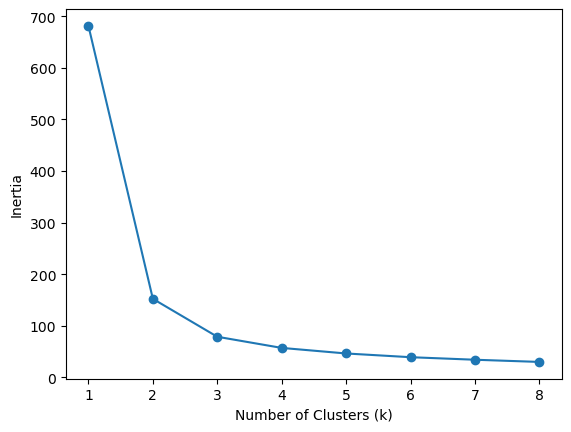

In [19]:
# Inertia: Measures Clustering Quality
# Using the elbow method to find the optimal number of clusters

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

samples = iris.data

# Code Start here:
num_clusters = list(range(1, 9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)

print(inertias)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

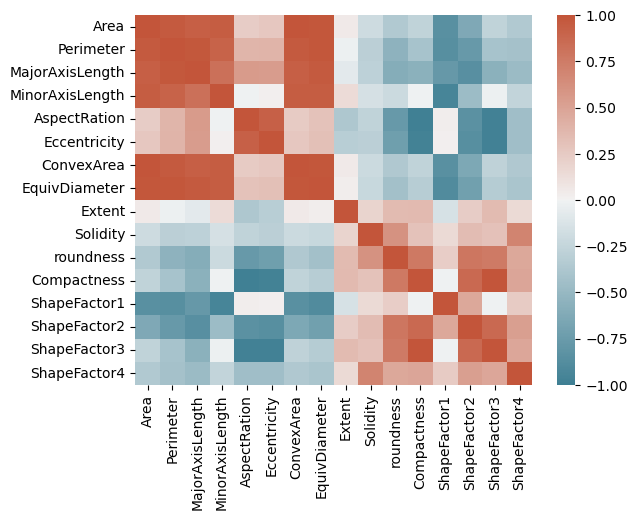

eigenvectors: 
[[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 -1.49091929e-02  1.18162546e-01 -2.00947006e-01
  -3.52366452e-01  1.01996482e-01  1.73639683e-01  2.73549959e-02
  -6.85301970e-01 -1.86251185e-01  3.46019418e-01  1.74431583e-01]
 [ 2.36199383e-01  3.43460651e-01  7.50039030e-03 -6.12997105e-02
  -4.29258549e-03 -2.78820146e-02 -6.23528140e-02  9.47252766e-02
   4.14230636e-01  4.81150315e-01  4.73720993e-03  4.13935

In [26]:
# Principal Component Analysis (PCA): Dimensionality Reduction
# Implementing PCA in NumPy I

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix = pd.read_csv('./data/data_matrix.csv')
# data_matrix.head(5)
# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr() # The method is from pandas
# print(correlation_matrix)

# Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()

# 2. Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 3. Print out the eigenvectors and eigenvalues
print('eigenvalues: ')
print(eigenvalues)

print('eigenvectors: ')
print(eigenvectors)

# Save the eigenvalues to a DataFrame
df = pd.DataFrame(eigenvalues, columns=['Eigenvalues'])

# Save the DataFrame to a CSV file
df.to_csv('./data/eigenvalues.csv', index=False)


[5.54664386e-01 2.64309732e-01 8.00656422e-02 5.11408029e-02
 2.73929290e-02 1.14976093e-02 6.97650724e-03 3.25082500e-03
 5.16266295e-04 9.08681206e-05 6.58867938e-05 1.83739336e-05
 9.29966038e-06 6.25641679e-07 1.11549485e-07 1.34132086e-07]


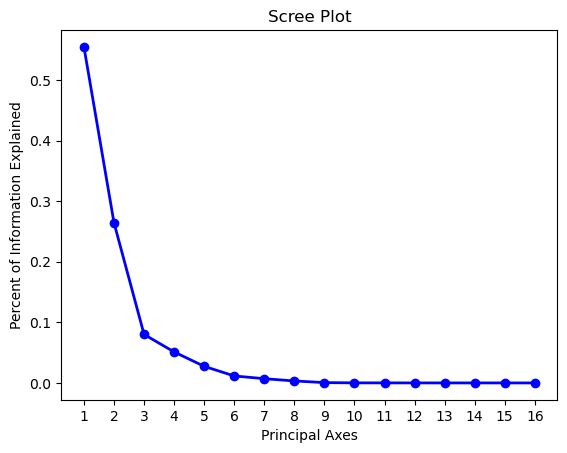

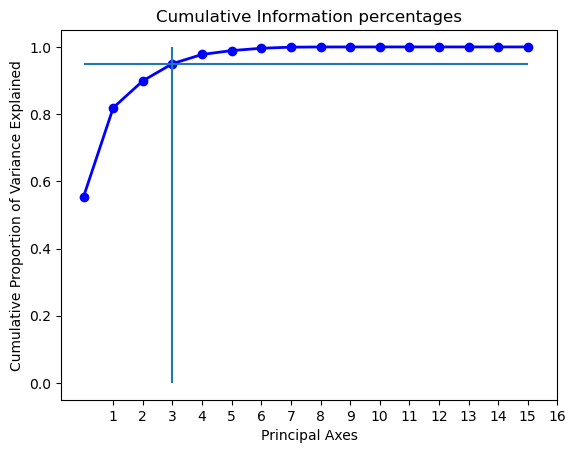

In [28]:
# Implementing PCA in NumPy II - Analysis
import pandas as pd
import matplotlib.pyplot as plt

eigenvalues = pd.read_csv('./data/eigenvalues.csv')['Eigenvalues'].values

# 1. Find the proportion of information for each eigenvector, which is equal to the eigenvalues divided by the sum of all eigenvalues
info_prop = eigenvalues / eigenvalues.sum()
print(info_prop)

# Plot the principal axes vs the information proportions for each principal axis

plt.plot(np.arange(1,len(info_prop)+1),info_prop, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Percent of Information Explained')
plt.show()
plt.clf()

# 2. Find the cumulative sum of the proportions
cum_info_prop = np.cumsum(info_prop)

# Plot the cumulative proportions array

plt.plot(cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=.95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=1)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

In [31]:
# Implementing PCA using Scikit-Learn
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


data_matrix = pd.read_csv('./data/data_matrix.csv')

# 1. Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
print(data_matrix_standardized.head())
data_matrix_standardized.to_csv('./data/data_matrix_standardized.csv', index=False)

# 2. Find the principal components
pca = PCA()
components = pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840718  -1.143277        -1.306550        -0.631130     -1.564995   
1 -0.829157  -1.013887        -1.395860        -0.434429     -1.969712   
2 -0.807128  -1.078789        -1.252311        -0.585713     -1.514236   
3 -0.785712  -0.977179        -1.278778        -0.439274     -1.741554   
4 -0.781210  -1.097344        -1.380420        -0.266654     -2.117915   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185640   -0.841420      -1.063302  0.289077  0.367600   1.423815   
1     -3.685904   -0.826071      -1.044178  0.697451 -0.462889   0.231046   
2     -2.045261   -0.808674      -1.008047  0.578174  0.518398   1.252819   
3     -2.742110   -0.773947      -0.973301  0.671235 -2.241685   0.515030   
4     -4.534862   -0.784257      -0.966044  0.476003  0.804743   1.874924   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839049     

        PC1       PC2       PC3       PC4
0 -4.981378  1.824630  0.748993 -0.390797
1 -5.436593  2.932257  2.182294 -0.431944
2 -4.757913  1.826817  0.514019 -0.125849
3 -4.300383  2.003587  3.554316  0.082961
4 -6.349107  4.088055  1.179156 -0.830327


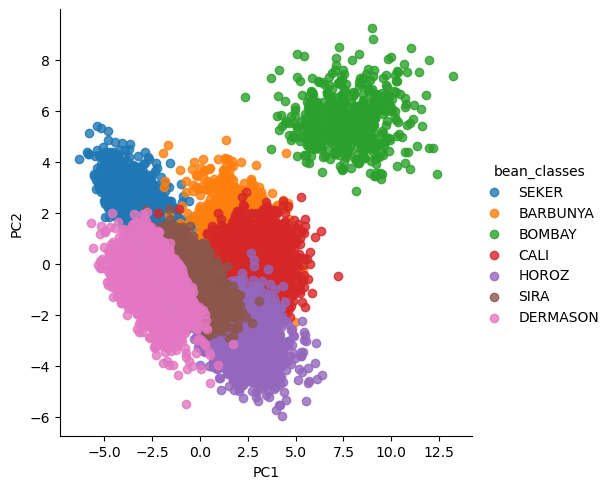

In [32]:
# Projecting the Data onto the principal Axes
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix_standardized = pd.read_csv('./data/data_matrix_standardized.csv')
classes = pd.read_csv('./data/classes.csv')['Class']

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())

# 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

In [34]:
# PCA as Features
# Dimensionality Reduction with PCA and then Linear SVC for Classification
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
 
 
data_matrix_standardized = pd.read_csv('./data/data_matrix_standardized.csv')
classes = pd.read_csv('./data/classes.csv')
 
# We will use the classes as y
y = classes.Class.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')

/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Score for model with 4 PCA features: 0.847506678539626
Score for model with original features: 0.9169634906500446


/home/jaden/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Number of features(pixels) per image: 4096
Number of images: 400
Square image side length: 64


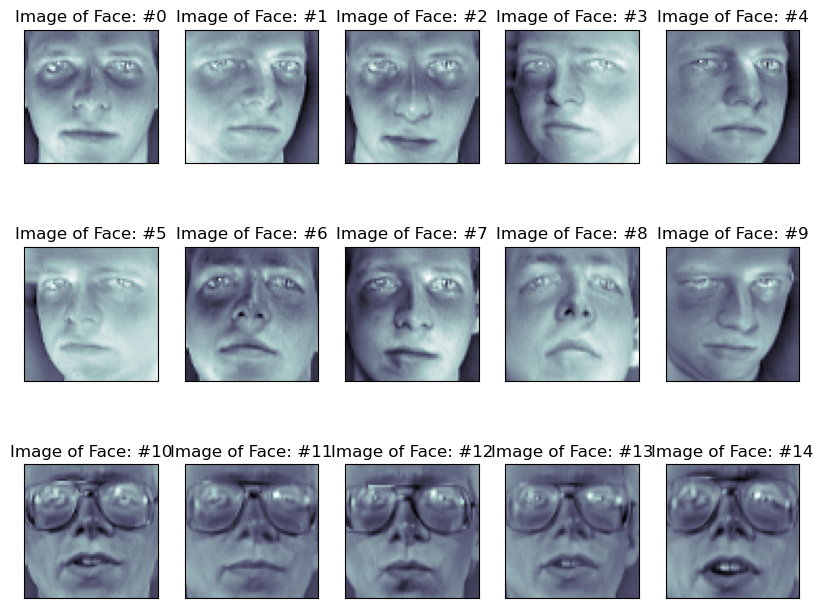

In [39]:
# PCA for Images I

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
 
 
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']
 
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std
faces_standardized_df = pd.DataFrame(faces_standardized)
faces_standardized_df.to_csv('./data/faces_standardized.csv', index=False)
 
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Number of images: {n_images}')
print(f'Square image side length: {side_length}')
 
 
# 3. Paste the plotting code below:
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()


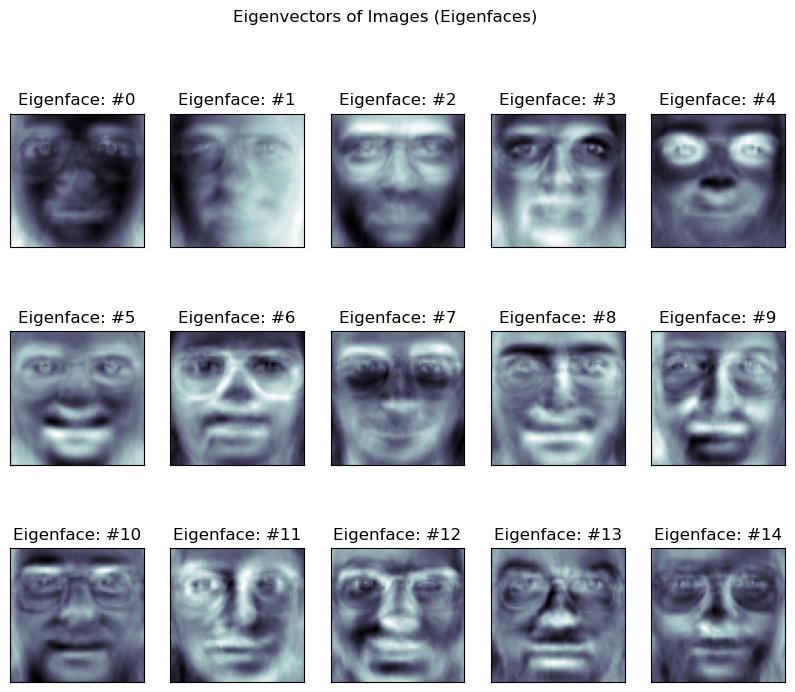

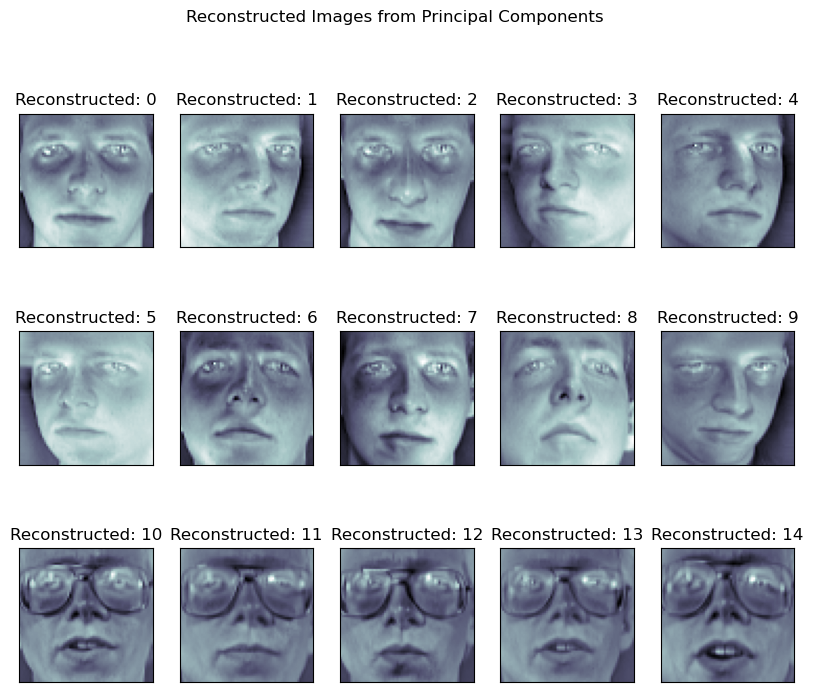

In [47]:
# PCA for Images II

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


faces_standardized = pd.read_csv('./data/faces_standardized.csv').values

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()